In [8]:
# Prepare a multinomial name based classification model for text classification of email messages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [10]:
# Let in one encoding which includes many non a why

In [11]:
df= pd.read_csv("/content/spam.csv", encoding="Latin-1")

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df = df [['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df = df.rename(columns={'v1':'label', 'v2':'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
x = df['text']
y = df['label']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
distribution = y.value_counts()
distribution

,count
label,
ham,4825
spam,747


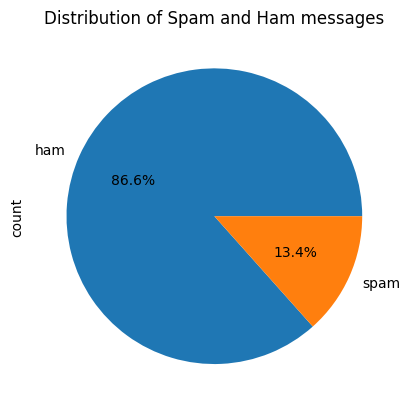

In [18]:
distribution.plot(kind='pie', autopct ='%1.1f%%')
plt.title('Distribution of Spam and Ham messages')
plt.show()

In [19]:
spam_text = ''.join(df[df['label'] == 'spam']['text'])
spam_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 infoURGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

In [20]:
spam_wordcloud = WordCloud(width=1000, height=1000, max_words= 100, random_state= 42, background_color='white').generate(spam_text)

In [21]:
# A word cloud in py is a visual representation is a text data that uses the size and color of words
# to show there frequency.

In [22]:
spam_wordcloud

In [23]:
ham_text = ''.join(df[df['label'] == 'ham']['text'])
ham_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if thatåÕs the way u feel. ThatåÕs the way its gota 

In [24]:
ham_wordcloud= WordCloud(width=1000, height=1000, max_words= 100, random_state= 42, background_color='white').generate(ham_text)
ham_wordcloud

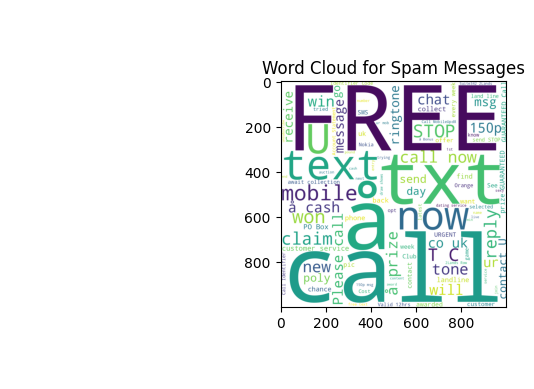

In [25]:
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for Spam Messages')
plt.show()

In [26]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [27]:
# COUNT VECTORIZER IS A TEXT PROCESSING TECHIQUE WHICH USE IN THE NLP TASK FOR CONVERTNG A COLLECTION OF TEXT INTO NUMERICAL REPRESENTATIONS.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
Count_Vectorizer = CountVectorizer()
x_train = Count_Vectorizer.fit_transform(x_train)
x_test = Count_Vectorizer.transform(x_test)

AttributeError: 'csr_matrix' object has no attribute 'lower'

In [ ]:
model_multimonial = MultinomialNB()
model_multimonial.fit(x_train, y_train)

In [ ]:
model_gaussian = GaussianNB()
model_gaussian.fit(x_train.toarray(), y_train)


In [ ]:
#Calculate the eucladian distance b/w k no of neighbours
# count the no of datapoints in each category assign the new data point to that category for which the no of neighbours are maxkmiumn
# then out djsdsad






#for consideratssknd